### 필요 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

### 데이터 가져오기

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### 데이터 크기 확인

In [3]:
print(len(train_images))
print(len(train_labels))
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

60000
60000
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


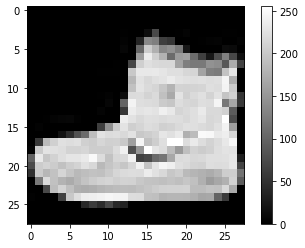

In [4]:
# 28x28의 흑백 이미지를 plt를 이용하여 출력하는 코드를 작성해보세요
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.show()

In [5]:
# dtype을 이용하여 이미지의 np array type을 확인해보세요.
train_images.dtype

dtype('uint8')

In [6]:
# train/test 전체 데이터에서 각 images, labels의 min, max를 출력하는 코드를 작성하세요.
print("train_image 최소값 :", np.min(train_images), "train_image 최대값 :", np.max(train_images))
print("test_image 최소값 :", np.min(test_images), "test_image 최대값 :", np.max(test_images))
print("train_label 최소값 :", np.min(train_labels), "train_label 최대값 :", np.max(train_labels))
print("test_label 최소값 :", np.min(test_labels), "test_label 최대값 :", np.max(test_labels))

train_image 최소값 : 0 train_image 최대값 : 255
test_image 최소값 : 0 test_image 최대값 : 255
train_label 최소값 : 0 train_label 최대값 : 9
test_label 최소값 : 0 test_label 최대값 : 9


### 데이터 전처리

In [7]:
# train/test 데이터의 타입을 dtype으로 확인해보고 실수형으로 전환하는 코드를 작성하세요.
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

print(train_images.dtype)
print(test_images.dtype)

float64
float64


In [8]:
# images의 값이 0-1사이의 값을 같도록 코드를 작성해보세요.
train_images = train_images/train_images.max()
test_images = test_images/test_images.max()
print('최소값:', np.min(train_images), '최대값:', np.max(train_images))
print('최소값:', np.min(test_images), '최대값:', np.max(test_images))
print(train_images.shape)
print(test_images.shape)

최소값: 0.0 최대값: 1.0
최소값: 0.0 최대값: 1.0
(60000, 28, 28)
(10000, 28, 28)


In [9]:
# 노말라이즈 후 min/max, shape, 0이 아닌 값, dtype 등을 확인하는 코드를 작성해보세요. 
train_images.dtype

dtype('float64')

In [10]:
test_images.dtype

dtype('float64')

In [11]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [12]:
print(train_images.min())
print(train_images.max())

0.0
1.0


In [13]:
# (배치, 28, 28)의 흑백 shape을 (배치, 28, 28, 3)의 칼라 shape의 영역으로 확대하는 코드를 추가하세요.
from skimage import color

train_images = color.gray2rgb(train_images)
test_images = color.gray2rgb(test_images)
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [17]:
train_images = np.array([color.gray2rgb(img) for img in train_images])
test_images = np.array([color.gray2rgb(img) for img in test_images])
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


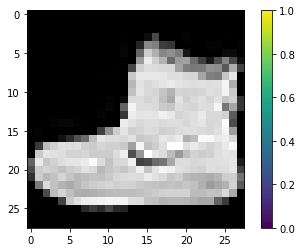

In [18]:
plt.imshow(train_images[0])
plt.colorbar()

### 데이터 이미지 시각화

In [19]:
# (60000, 28, 28, 3)인 train_images에서 (5, 28, 28, 3)을 획득하는 코드를 작성하세요.
train_images[:5].shape

(5, 28, 28, 3)

In [21]:
# 해당 기능을 이용해서 (28, 140)을 작성하는 코드를 작성해보세요.
train_images[:5].transpose(1,0,2,3).reshape((28, -1, 3)).shape

(28, 140, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

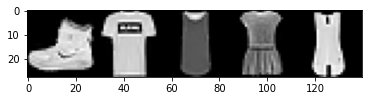

In [23]:
# (28, 140, 3)의 이미지를 plt로 출력해보세요.
plt.imshow(train_images[:5].transpose(1,0,2,3).reshape((28, -1, 3)))
plt.show

In [33]:
# np.random.random을 이용해서 0-1 사의의 랜덤값을 3회 출력하는 코드를 작성하시오.
np.random.random(3)

array([0.22757925, 0.97240875, 0.39861482])

In [36]:
# np.random.randpm 함수와 shape 파라매터를 이용하여 (28, 28, 3)의 랜덤 노이즈를 생성하는 코드를 작성하시오.
np.random.random((28,28,3)).shape

(28, 28, 3)

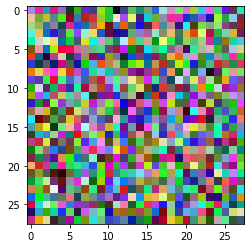

In [37]:
# plt를 통하여 random (28, 28, 3) 노이즈를 2회 출력하는 코드를 작성하시고, 이미지가 다른지 확인하세요.
plt.imshow(np.random.random((28,28,3)))
plt.show()

In [38]:
# 가우시안 노이즈 함수를 이용하여 mu 0.1 std 0.1 size 1인 랜덤값을 3번 출력하는 코드를 작성하세요.
print(np.random.normal(0, 0.1, 1))
print(np.random.normal(0, 0.1, 1))
print(np.random.normal(0, 0.1, 1))

[0.02548185]
[-0.0294141]
[-0.02751391]


In [39]:
# 가우시안 노이즈 함수 mu = 3.0, std = 0.1, size = 1을 3 회 출력, mu = 0.0, std = 0.01, size = 1을 3회 출력하는 코드를 작성해보세요.
print(np.random.normal(3, 0.01, 1))
print(np.random.normal(3, 0.01, 1))
print(np.random.normal(3, 0.01, 1))

[3.00341296]
[2.99656285]
[2.99812307]


In [40]:
# 가우시안 노이즈 함수를 방금 위의 문제를 옵션으로 size를 (28, 28, 3)로 생성 후 plt로 출력하는 코드를 작성해보세요. 단, std = 0.01
print(np.random.normal(loc = 3.0, scale = 0.1, size = 1))
print(np.random.normal(loc = 3.0, scale = 0.1, size = 1))
print(np.random.normal(loc = 3.0, scale = 0.1, size = 1))

[3.0938028]
[3.06616312]
[2.98965011]


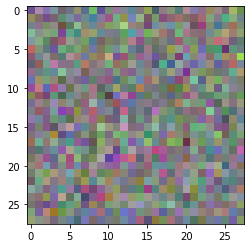

In [42]:
plt.imshow(np.random.normal(loc = 0.5, scale = 0.1, size = (28, 28, 3)))
plt.show()

In [46]:
# train_images[5]와 가우시안 노이즈 (28, 28, 3)을 더한 뒤 noisy_image 변수에 할당하는 코드를 작성하세요. mu = 0.5, std = 0.05
noisy_image = train_images[5] + np.random.normal(loc = 0.5, scale = 0.05, size = (28, 28, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


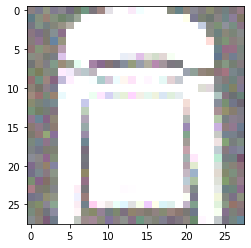

In [47]:
plt.imshow(noisy_image)
plt.show()

In [51]:
# train_noisy_image와 test_nosiy_images를 생성하는 코드를 작성하세요.
train_noisy_images = train_images + np.random.normal(0.5, 0.05, train_images.shape)
train_noisy_images[train_noisy_images > 1.0] = 1.0
test_noisy_images = test_images + np.random.normal(0.5, 0.05, test_images.shape)
test_noisy_images[test_noisy_images > 1.0] = 1.0

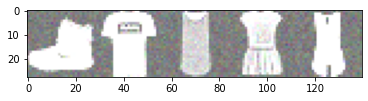

In [53]:
# 노이즈가 추가된 train_noisy_images에서 5장을 plt으로 출력하는 코드를 작성하세요.
plt.imshow(train_noisy_images[:5].transpose(1,0,2,3).reshape(28, -1, 3))

In [54]:
from keras.layers import Dense, Input, Conv2D, Conv2DTranspose, Flatten, Reshape
from keras.models import Model

In [62]:
inputs = Input(shape=(28, 28, 3))

x = Conv2D(32, 3, 2, activation = 'relu', padding = 'same')(inputs)
x = Conv2D(64, 3, 2, activation = 'relu', padding = 'same')(x)
x = Flatten()(x)
latent = Dense(10)(x)

x = Dense(7*7*64)(latent)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(64, 3, 2, activation = 'relu', padding = 'same')(x)
x = Conv2DTranspose(32, 3, 2, activation = 'relu', padding = 'same')(x)
x = Conv2DTranspose(3, 3, activation = 'sigmoid', padding = 'same')(x)

model = Model(inputs, x)

In [63]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                31370     
_________________________________________________________________
dense_5 (Dense)              (None, 3136)              34496     
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0   

In [64]:
# 만든 모델에 loss는 mse, optimizer는 adam 매트릭은 accuracy으로 설정하는 코드를 작성하세요.
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

In [68]:
hist = model.fit(train_noisy_images, train_images, validation_data=(test_noisy_images, test_images), epochs = 5, verbose = 2)

Epoch 1/5
1875/1875 - 4s - loss: 0.0151 - accuracy: 0.3327 - val_loss: 0.0150 - val_accuracy: 0.3331
Epoch 2/5
1875/1875 - 4s - loss: 0.0148 - accuracy: 0.3293 - val_loss: 0.0147 - val_accuracy: 0.3392
Epoch 3/5
1875/1875 - 4s - loss: 0.0145 - accuracy: 0.3480 - val_loss: 0.0146 - val_accuracy: 0.3706
Epoch 4/5
1875/1875 - 4s - loss: 0.0143 - accuracy: 0.3707 - val_loss: 0.0143 - val_accuracy: 0.3896
Epoch 5/5
1875/1875 - 4s - loss: 0.0142 - accuracy: 0.3984 - val_loss: 0.0143 - val_accuracy: 0.4064


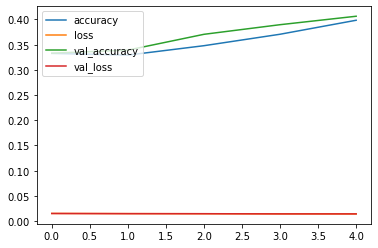

In [69]:
# 학습 모델 시각화
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc = 'upper left')
plt.show()

In [70]:
# 모델에 test_noisy_images 중 1장을 넣고 결과를 받는 코드를 작성하세요.
res = model.predict(test_noisy_images[0:1])
res.shape

(1, 28, 28, 3)

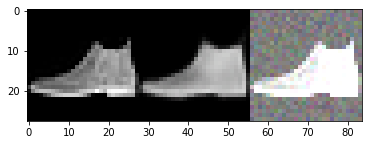

In [74]:
# res와 test_noisy_images[0], test_images[0]를 width 방향으로 결합하여 (28, 28 * 3, 3) 의 이미지를 만들어 plt로 출력하는 코드를 작성하세요
plt.imshow(np.concatenate([test_images[0], res[0], test_noisy_images[0]], axis = 1))
plt.show()

In [75]:
loss, accuracy = model.evaluate(test_noisy_images, test_images, verbose = 1)
print(loss, accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0143 - accuracy: 0.4064
0.014251833781599998 0.40640369057655334


In [76]:
five = model.predict(test_noisy_images[:5])

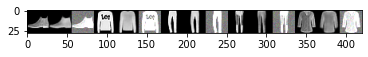

In [77]:
result = np.concatenate([test_images[:5], five, test_noisy_images[:5]], axis = 2).transpose((1, 0, 2, 3)).reshape((28, -1 ,3))
plt.imshow(result)
plt.show()

In [78]:
result.shape

(28, 420, 3)